In [ ]:
import pandas as pd

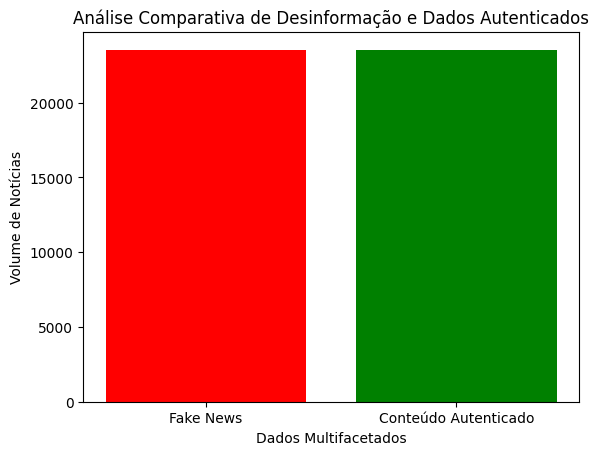

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados dos arquivos
fake_data = pd.read_excel('/content/fake.xlsx')
true_data = pd.read_excel('/content/news true.xlsx')

# Contar o número de notícias falsas e verdadeiras
num_fake_news = len(fake_data)
num_true_news = len(true_data)

# Criar o gráfico de barras comparativo
labels = ['Fake News', 'Conteúdo Autenticado']
values = [num_fake_news, num_true_news]

plt.bar(labels, values, color=['red', 'green'])
plt.xlabel('Dados Multifacetados')
plt.ylabel('Volume de Notícias')
plt.title('Análise Comparativa de Desinformação e Dados Autenticados')
plt.show()


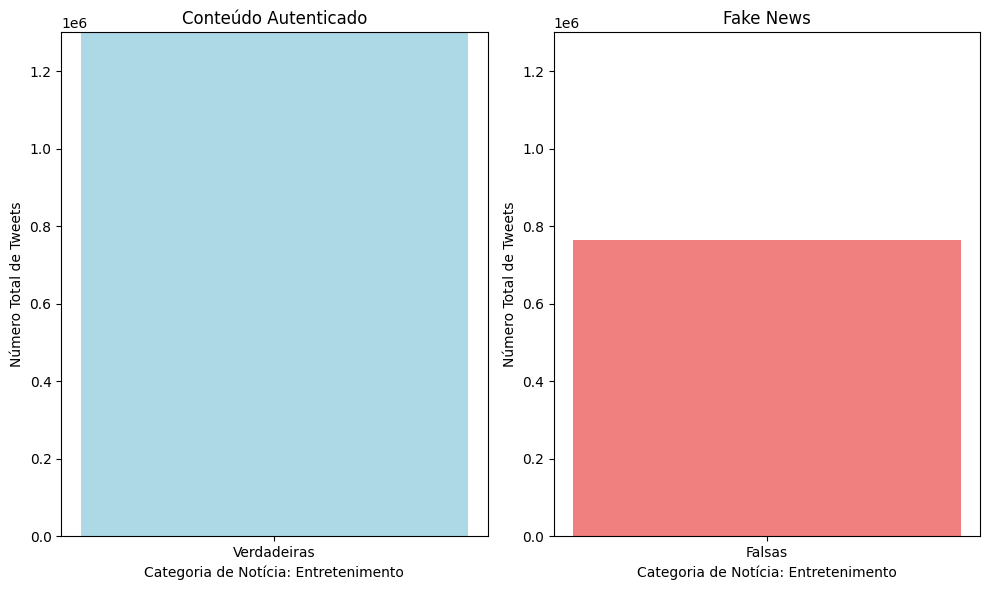

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o arquivo CSV
data = pd.read_csv('/content/fake news.csv')

# Separando os dados entre notícias verdadeiras e falsas
true_data = data[data['real'] == 1]
false_data = data[data['real'] == 0]

# Obtendo o número total de tweets para notícias verdadeiras e falsas
true_tweets = true_data['tweet_num'].sum()
false_tweets = false_data['tweet_num'].sum()

# Definindo o maior valor entre os totais de tweets
max_tweets = max(true_tweets, false_tweets)

# Criando gráfico de barras para comparação de tweets entre notícias verdadeiras e falsas
plt.figure(figsize=(10, 6))

# Gráfico de barras para notícias verdadeiras
plt.subplot(1, 2, 1)
plt.bar('Verdadeiras', true_tweets, color='lightblue')
plt.xlabel('Categoria de Notícia: Entretenimento')
plt.ylabel('Número Total de Tweets')
plt.title('Conteúdo Autenticado')
plt.ylim(0, max_tweets)  # Define o limite y para ambos os gráficos

# Gráfico de barras para notícias falsas
plt.subplot(1, 2, 2)
plt.bar('Falsas', false_tweets, color='lightcoral')
plt.xlabel('Categoria de Notícia: Entretenimento')
plt.ylabel('Número Total de Tweets')
plt.title('Fake News')
plt.ylim(0, max_tweets)  # Define o limite y para ambos os gráficos

plt.tight_layout()
plt.show()

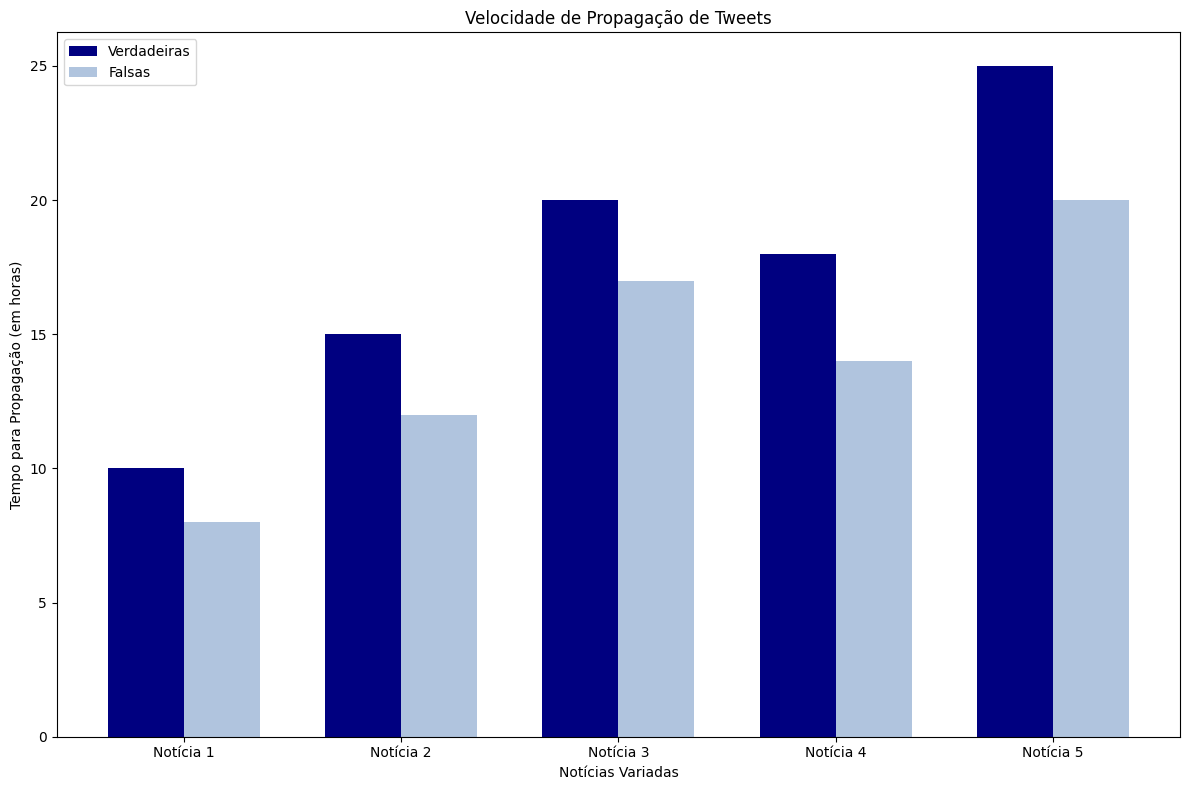

In [10]:
import matplotlib.pyplot as plt

# Dados das notícias (apenas alguns exemplos para ilustração)
labels = ['Notícia 1', 'Notícia 2', 'Notícia 3', 'Notícia 4', 'Notícia 5']
true_speed = [10, 15, 20, 18, 25]  # Tempo para notícias verdadeiras
false_speed = [8, 12, 17, 14, 20]  # Tempo para notícias falsas

x = range(len(labels))

plt.figure(figsize=(12, 8))  # Ajusta o tamanho da figura

bar_width = 0.35

# Plota o gráfico para notícias verdadeiras com cor mais escura
plt.bar(x, true_speed, width=bar_width, label='Verdadeiras', color='navy')

# Plota o gráfico para notícias falsas com cor mais clara
plt.bar([i + bar_width for i in x], false_speed, width=bar_width, label='Falsas', color='lightsteelblue')

plt.xlabel('Notícias Variadas')
plt.ylabel('Tempo para Propagação (em horas)')
plt.title('Velocidade de Propagação de Tweets')
plt.xticks([i + bar_width / 2 for i in x], labels)
plt.legend()
plt.tight_layout()

plt.show()


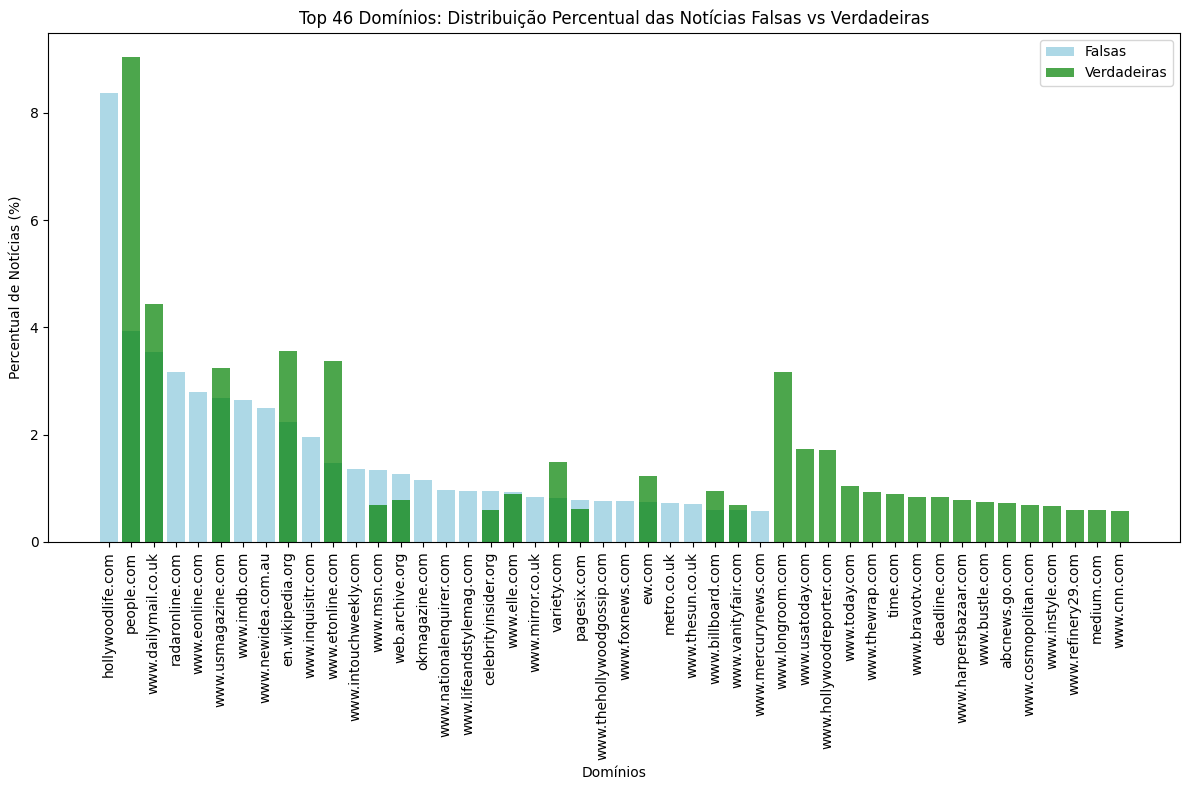

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Seus dados
data = pd.read_csv('/content/fake news.csv')


# Calcular a distribuição percentual de notícias falsas por domínio
fake_news = data[data['real'] == 0]['source_domain'].value_counts(normalize=True) * 100
true_news = data[data['real'] == 1]['source_domain'].value_counts(normalize=True) * 100

# Pegar os top 46 domínios de notícias falsas e verdadeiras
top_fake_news = fake_news.head(30)
top_true_news = true_news.head(30)

# Plotagem do gráfico
plt.figure(figsize=(12, 8))

# Plotar as notícias falsas
plt.bar(top_fake_news.index, top_fake_news, color='lightblue', label='Falsas')

# Plotar as notícias verdadeiras
plt.bar(top_true_news.index, top_true_news, color='green', alpha=0.7, label='Verdadeiras')

plt.xlabel('Domínios')
plt.ylabel('Percentual de Notícias (%)')
plt.title('Top 46 Domínios: Distribuição Percentual das Notícias Falsas vs Verdadeiras')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Mostrar o gráfico
plt.show()


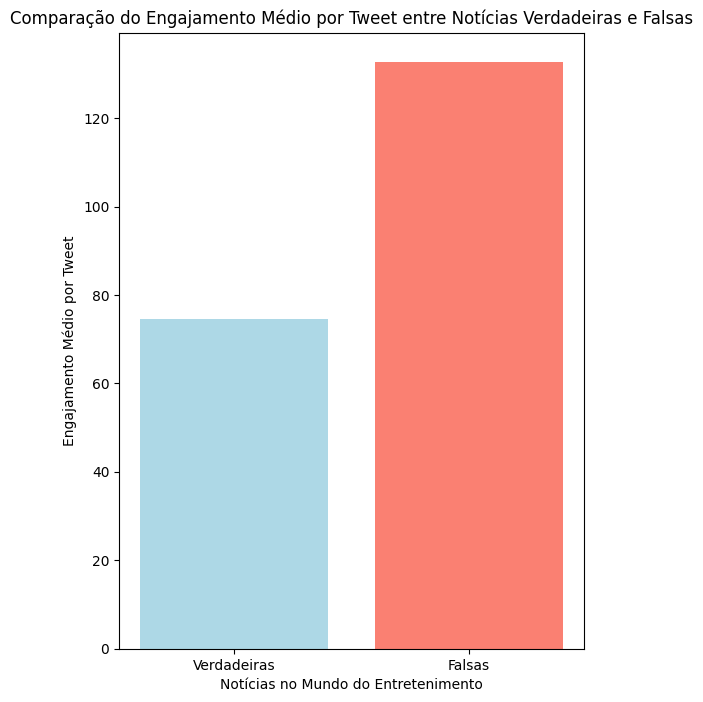

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/content/fake news.csv')

# Calcular o engajamento médio por tweet para notícias verdadeiras e falsas
engagement_true = data[data['real'] == 1]['tweet_num'].mean()
engagement_false = data[data['real'] == 0]['tweet_num'].mean()

# Plotagem do gráfico de barras
plt.figure(figsize=(6, 8))

# Criar barras para representar o engajamento médio por tweet
plt.bar(['Verdadeiras', 'Falsas'], [engagement_true, engagement_false], color=['lightblue', 'salmon'])

plt.xlabel('Notícias no Mundo do Entretenimento')
plt.ylabel('Engajamento Médio por Tweet')
plt.title('Comparação do Engajamento Médio por Tweet entre Notícias Verdadeiras e Falsas')

plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


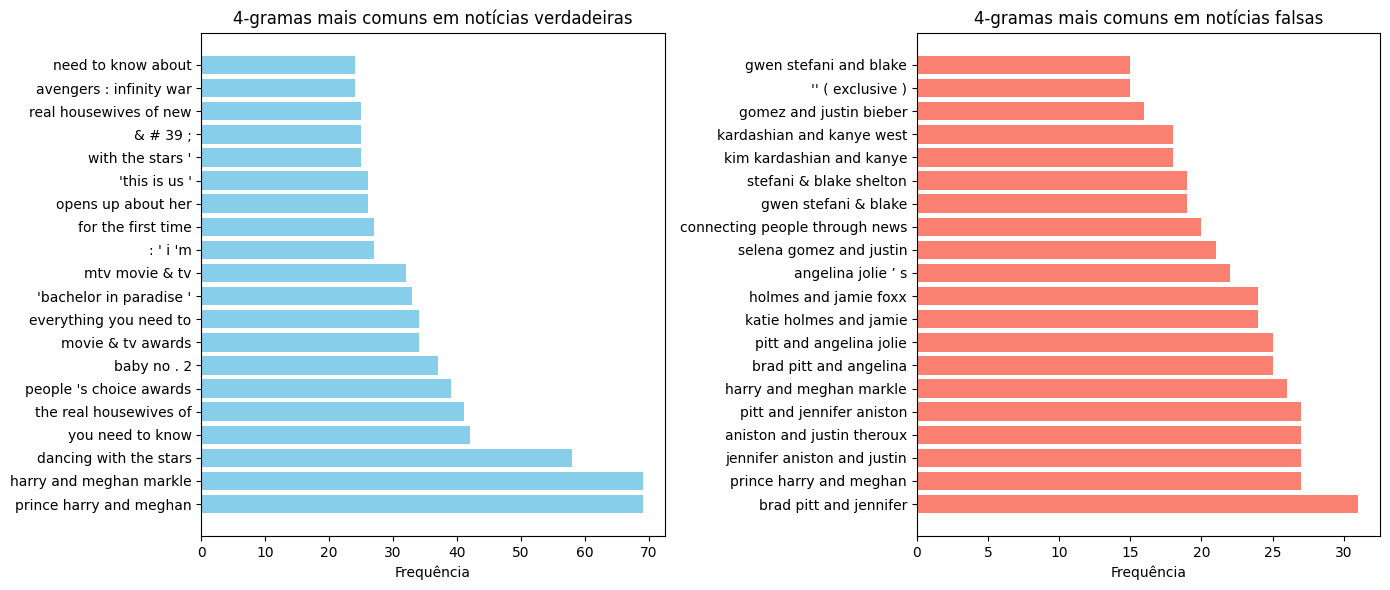

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
import re
nltk.download('punkt')  # Baixar os recursos necessários para tokenização

# Carregar os dados (substitua 'seu_arquivo.csv' pelo nome do seu arquivo)
data = pd.read_csv('/content/fake news.csv')

# Função para extrair 4-gramas mais comuns
def get_common_4grams(news):
    filtered_news = news[news.apply(lambda x: len(re.findall(r'\b\w+\b', x)) >= 4)]
    all_text = ' '.join(filtered_news.tolist()).lower()  # Concatenar todos os títulos
    tokens = nltk.word_tokenize(all_text)  # Tokenizar as palavras
    four_grams = nltk.ngrams(tokens, 4)  # Obter os 4-gramas
    four_gram_freq = Counter(four_grams)  # Contar a frequência dos 4-gramas
    return four_gram_freq

# Obter os 4-gramas mais comuns nas notícias verdadeiras e falsas
true_news = data[data['real'] == 1]['title']
false_news = data[data['real'] == 0]['title']

top_4grams_true = get_common_4grams(true_news)
top_4grams_false = get_common_4grams(false_news)

# Selecionar os 20 4-gramas mais comuns para cada tipo de notícia
top_4grams_true = dict(sorted(top_4grams_true.items(), key=lambda item: item[1], reverse=True)[:20])
top_4grams_false = dict(sorted(top_4grams_false.items(), key=lambda item: item[1], reverse=True)[:20])

# Plotar os gráficos de barras dos 4-gramas mais comuns
plt.figure(figsize=(14, 6))

# Gráfico para os 4-gramas mais comuns nas notícias verdadeiras
plt.subplot(1, 2, 1)
plt.barh([' '.join(gram) for gram in top_4grams_true.keys()], top_4grams_true.values(), color='skyblue')
plt.xlabel('Frequência')
plt.title('4-gramas mais comuns em notícias verdadeiras')

# Gráfico para os 4-gramas mais comuns nas notícias falsas
plt.subplot(1, 2, 2)
plt.barh([' '.join(gram) for gram in top_4grams_false.keys()], top_4grams_false.values(), color='salmon')
plt.xlabel('Frequência')
plt.title('4-gramas mais comuns em notícias falsas')

plt.tight_layout()
plt.show()